# Canny Algorithm for Edge Detection

In [39]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
# Load the image file and convert it to grayscale................
img = cv2.imread('Image_12.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [12]:
dx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
dy = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)

In [13]:
grad_mag = cv2.magnitude(dx, dy)

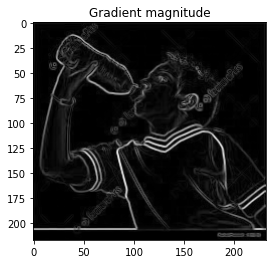

In [14]:
plt.imshow(grad_mag, cmap='gray')
plt.title('Gradient magnitude')
plt.show()


In the output image, the bright regions correspond to high gradient magnitudes, while the dark regions correspond to low gradient magnitudes.

The gradient magnitude can be used to determine the strength of edges in the input image.

In [15]:
blur = cv2.GaussianBlur(gray, (3,3), 0)
edges = cv2.Canny(blur, 30, 150)

In [16]:
weak_edges = np.zeros_like(edges)
strong_edges = np.zeros_like(edges)
strong_edges[edges > 0] = 255

In [17]:
# Find the weak edges by applying a lower threshold value /....................................
thresh_low = 30
thresh_high = 150
strong_rows, strong_cols = np.where(edges > thresh_high)
weak_rows, weak_cols = np.where((edges >= thresh_low) & (edges <= thresh_high))
weak_edges[weak_rows, weak_cols] = 255

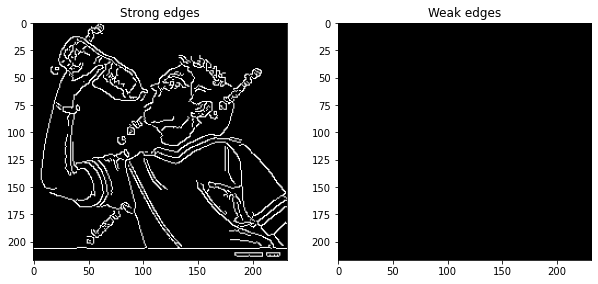

In [18]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))
ax1.imshow(strong_edges, cmap='gray')
ax1.set_title('Strong edges')
ax2.imshow(weak_edges, cmap='gray')
ax2.set_title('Weak edges')
plt.show()

The output of the above code is a grayscale image where the pixel values represent the edges of the input image, separated into strong and weak edges.

In the output image, the bright regions correspond to strong edges, while the dark regions correspond to weak edges. The strong edges are typically those with high gradient magnitudes above a certain threshold, while the weak edges are those with lower gradient magnitudes.

The threshold values used to separate the strong and weak edges can be adjusted to obtain different results. 

In [36]:
grad_x = cv2.Sobel(gray, cv2.CV_32F, 1, 0, ksize=3)
grad_y = cv2.Sobel(gray, cv2.CV_32F, 0, 1, ksize=3)

In [37]:
grad_mag, grad_ang = cv2.cartToPolar(grad_x, grad_y, angleInDegrees=True)

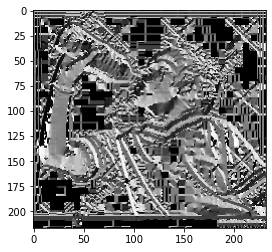

In [38]:
plt.imshow(grad_ang, cmap='gray')
plt.show()


The output of the above code is a grayscale image where the pixel values represent the gradient angles of the input image. The image have the same dimensions as the input image.

In the output image, the bright regions correspond to high gradient angles, while the dark regions correspond to low gradient angles.

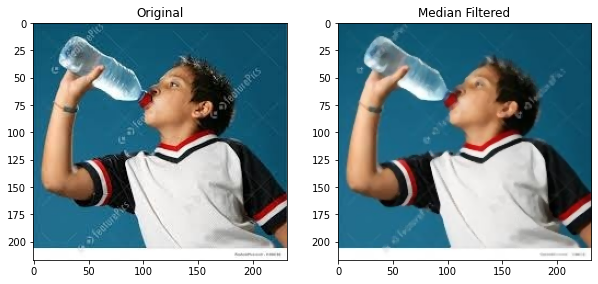

In [22]:
median = cv2.medianBlur(img, ksize=3)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax1.set_title('Original')
ax2.imshow(cv2.cvtColor(median, cv2.COLOR_BGR2RGB))
ax2.set_title('Median Filtered')
plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


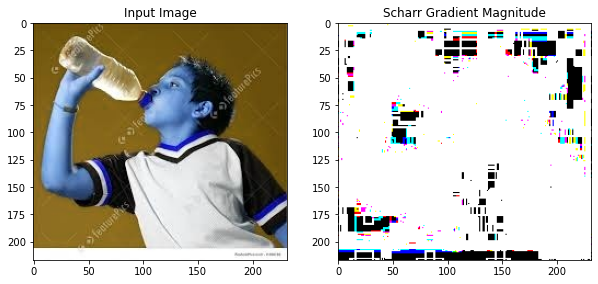

In [23]:

scharrx = cv2.Scharr(img, cv2.CV_64F, 1, 0)
scharry = cv2.Scharr(img, cv2.CV_64F, 0, 1)

mag, angle = cv2.cartToPolar(scharrx, scharry, angleInDegrees=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.imshow(img, cmap='gray')
ax1.set_title('Input Image')
ax2.imshow(mag, cmap='gray')
ax2.set_title('Scharr Gradient Magnitude')
plt.show()


# High/Low Threshload ratios, Grayscale and Gaussian Filter

In [ ]:
highThresholdRatio = 0.17
lowThresholdRatio = 0.12

img = cv2.cvtColor(np.float32(img), cv2.COLOR_BGR2GRAY)


img_smooth = cv2.GaussianBlur(img, (5,5), 1)


# Calculate gradient magnitude and direction

In [ ]:
sobel_x = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
sobel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
Gx = cv2.filter2D(src=img_smooth, kernel=sobel_x, ddepth=-1)
Gy = cv2.filter2D(src=img_smooth, kernel=sobel_y, ddepth=-1)
gradient_mag = np.sqrt(Gx**2 + Gy**2)
gradient_dir = np.arctan2(Gy, Gx) * 180 / np.pi

# Non-maximum suppression

In [ ]:
M, N = img.shape
nms = np.zeros((M, N), dtype=np.int32)
for i in range(1, M-1):
    for j in range(1, N-1):
        dir = gradient_dir[i, j]
        if dir < 0:
            dir += 180
        dir_round = int((dir + 22.5) / 45) % 4
        if dir_round == 0:  # East-West (horizontal)
            if (gradient_mag[i, j] > gradient_mag[i, j-1]) and (gradient_mag[i, j] > gradient_mag[i, j+1]):
                nms[i, j] = gradient_mag[i, j]
        elif dir_round == 1:  # North-East/South-West
            if (gradient_mag[i, j] > gradient_mag[i-1, j+1]) and (gradient_mag[i, j] > gradient_mag[i+1, j-1]):
                nms[i, j] = gradient_mag[i, j]
        elif dir_round == 2:  # North-South (vertical)
            if (gradient_mag[i, j] > gradient_mag[i-1, j]) and (gradient_mag[i, j] > gradient_mag[i+1, j]):
                nms[i, j] = gradient_mag[i, j]
        elif dir_round == 3:  # North-West/South-East
            if (gradient_mag[i, j] > gradient_mag[i-1, j-1]) and (gradient_mag[i, j] > gradient_mag[i+1, j+1]):
                nms[i, j] = gradient_mag[i, j]

# Hysteresis thresholding

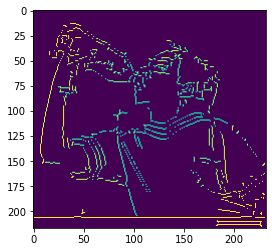

In [29]:
high_threshold = np.max(nms) * highThresholdRatio
low_threshold = high_threshold * lowThresholdRatio
strong_edges = nms > high_threshold
weak_edges = (nms > low_threshold) & (nms < high_threshold)
for i in range(1, M-1):
    for j in range(1, N-1):
        if weak_edges[i, j]:
            if strong_edges[i-1:i+2, j-1:j+2].any():
                strong_edges[i, j] = True
                weak_edges[i, j] = False

# Display edges
plt.imshow(strong_edges)

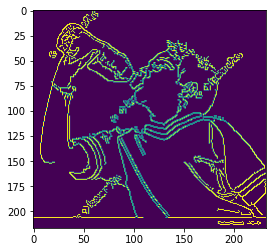

In [35]:
img = cv2.imread('Image_12.jpg', 0)
edges = edges = cv2.Canny(img,100,200)
plt.imshow(edges)